In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np 
import pandas as pd 
import scanpy as sc

In [ ]:
import sys, os
sys.path.append('../src')

from interaction import Interaction

In [ ]:
# # CLONAL EXPANSION
# name = 'jing_clonal_expansion'
# model_name = 'esm2_pca32'
# x_path = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+TEDDY/data/KIR+TEDDY_rna_filtered85.csv'
# y_path = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+TEDDY/data/KIR+TEDDY_Yexpanded_filtered85.csv'
# slide_outs = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+TEDDY/KIR+TEDDY_filtered85/KIR+TEDDY_filtered85_noint_output/0.01_0.5_out'
# tcr_embeddings = np.load('/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+TEDDY/data/ESM2_PCA32_KIR+TEDDY.npy')
# y = pd.read_csv(y_path)['Y'].values

# # ANTIGEN SPECIFICITY
# x_path = '/ix/djishnu/Jane/SLIDESWING/alok_data/data/Ins1_InsChg2_rna_MRfilt_forSLIDE.csv'
# y_path = '/ix/djishnu/Jane/SLIDESWING/alok_data/data/Ins1_InsChg2_rna_MRfilt_antigens.csv'
# slide_outs = '/ix/djishnu/Jane/SLIDESWING/alok_data/alok_data12_MRfilt_noint_out/0.01_2_out'
# tcr_embeddings = np.load('/ix/djishnu/Jane/SLIDESWING/alok_data/data/Ins1_InsChg2_vecs_beta_ESM2_PCA16.npy')
# y = pd.read_csv(y_path)['Antigen'].values - 1


In [ ]:
machop = Interaction(
    slide_outs, 
    plm_embed=tcr_embeddings, 
    y=y,
    interacts_only=False,
    model='LR'
)

In [10]:
machop.get_sig_interactions(fdr=0.5, n_iters=20, thresh=0.8)

100%|██████████| 20/20 [26:17<00:00, 78.87s/it]

Found 28 significant interactions with AUC=0.8017774705884906


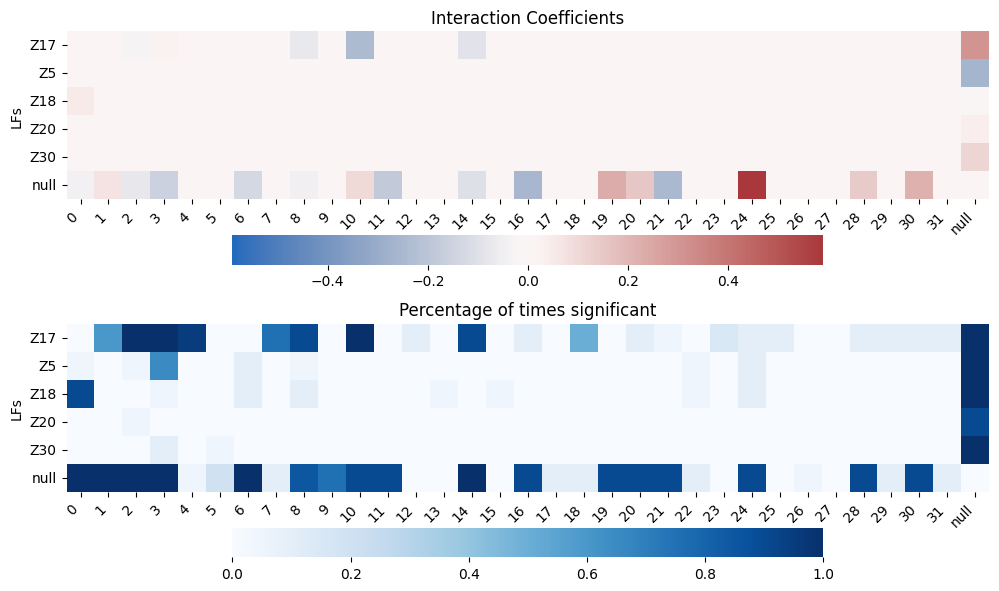

In [11]:
from plotting import show_interactions
show_interactions(machop, save_path=f'../results/interaction/{name}/{model_name}_betas.png')

In [31]:
machop.get_joint_embed()
joint_embed = machop.joint_embed.copy()
joint_embed.shape

(10191, 44)

In [ ]:
np.save(f'../results/interaction/{name}/{model_name}_joint_embed.npy', joint_embed)

In [33]:
full_embed = np.hstack([machop.z_matrix, machop.plm_embedding])
full_embed.shape

(10191, 39)

In [34]:
from models import Estimator
from sklearn.linear_model import Lasso, LinearRegression

# model = Lasso(alpha=0.05)
model = LinearRegression()


In [35]:
estimator = Estimator(model=model)
auc0 = estimator.evaluate(joint_embed, y)

estimator = Estimator(model=model)
auc1 = estimator.evaluate(full_embed, y)

estimator = Estimator(model=model)
auc2 = estimator.evaluate(machop.z_matrix, y)

estimator = Estimator(model=model)
auc3 = estimator.evaluate(machop.plm_embedding, y)

In [36]:
df = pd.DataFrame(
    np.vstack([auc0, auc1, auc2, auc3]),
    index=['joint', 'full', 'z-matrix', 'plm']
)
df.reset_index(inplace=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

joint vs. plm: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.571e-04 Stat=1.429e+01
plm vs. z-matrix: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.571e-04 Stat=1.429e+01
full vs. plm: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.571e-04 Stat=1.429e+01


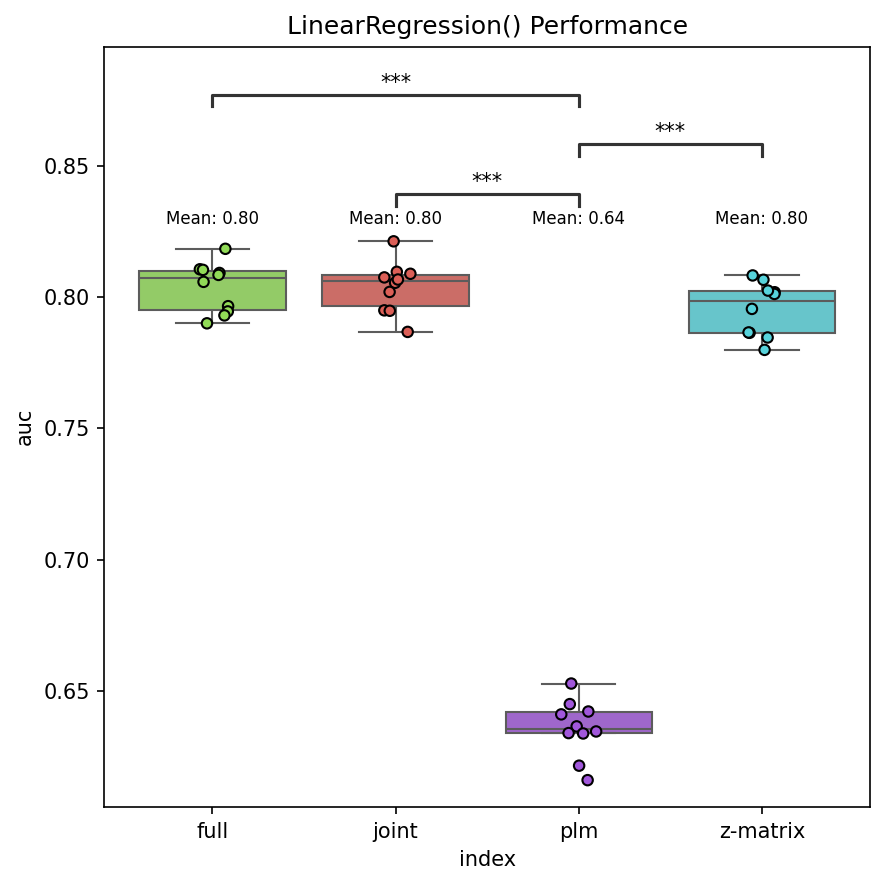

In [37]:
from plotting import show_performance
show_performance(model, df, 
                 save_path=f'../results/interaction/{name}/{model_name}_{model.__class__.__name__}_performance.png')

Found 44 significant interactions with AUC=0.8099901992645651


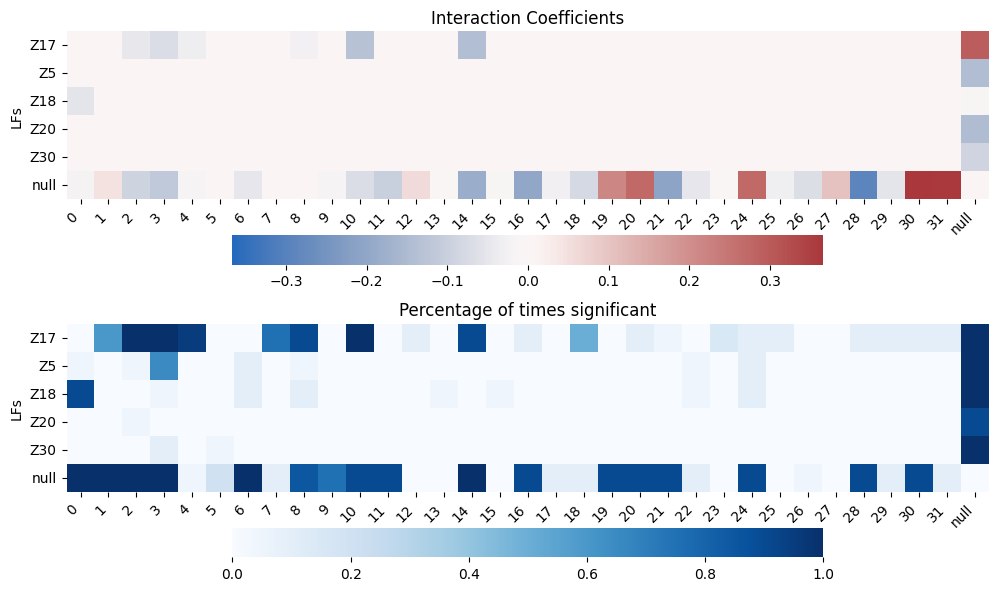

In [38]:
machop.force_linear_terms(z1=True, z2=True)
from plotting import show_interactions
show_interactions(machop, save_path=f'../results/interaction/{name}/{model_name}_betas_wlinear.png')

In [41]:
machop.get_joint_embed()
joint_embed = machop.joint_embed.copy()
joint_embed.shape

(10191, 44)

In [42]:
np.save(f'../results/interaction/{name}/{model_name}_joint_embed_wlinear.npy', joint_embed)

In [46]:
model = Lasso(alpha=0.05)
# model = LinearRegression()

In [47]:
estimator = Estimator(model=model)
auc0 = estimator.evaluate(joint_embed, y)

estimator = Estimator(model=model)
auc1 = estimator.evaluate(full_embed, y)

estimator = Estimator(model=model)
auc2 = estimator.evaluate(machop.z_matrix, y)

estimator = Estimator(model=model)
auc3 = estimator.evaluate(machop.plm_embedding, y)

In [48]:
df = pd.DataFrame(
    np.vstack([auc0, auc1, auc2, auc3]),
    index=['joint', 'full', 'z-matrix', 'plm']
)
df.reset_index(inplace=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

joint vs. plm: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.381e-05 Stat=1.631e+01
plm vs. z-matrix: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.381e-05 Stat=1.631e+01
full vs. plm: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.381e-05 Stat=1.631e+01


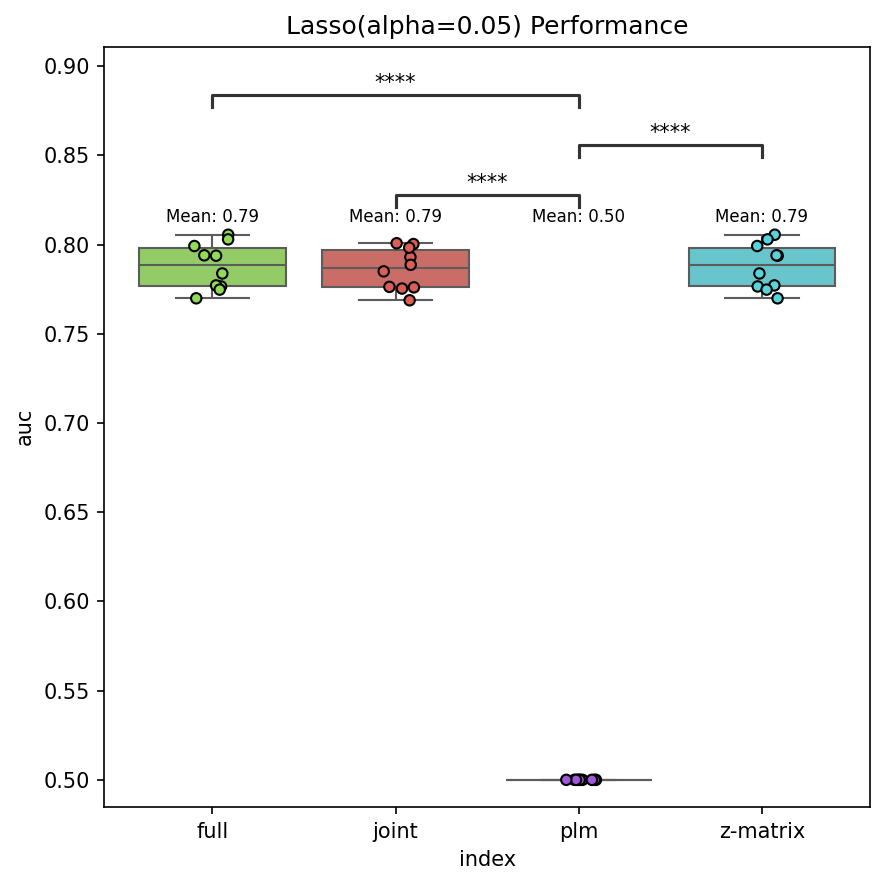

In [49]:
from plotting import show_performance
show_performance(model, df, 
                 save_path=f'../results/interaction/{name}/{model_name}_{model.__class__.__name__}_performance_wlinear.png')